# Sentiment Analysis

### Classical ML Models

In this notebook, my focus is on implementing three classical machine learning models: Naive-Bayes, Support Vector Machines (SVM), and Logistic Regression. The purpose of these models is to classify sentiments accurately based on the given data.

The notebook begins by loading the preprocessed tweet data, which has undergone cleaning and preprocessing steps to ensure its suitability for analysis. Next, I will proceed with feature extraction, which involves transforming the text data into numerical features that can be used as inputs for the machine learning models.

For each of the three models, I will follow a similar workflow:

1. Split the data into training and testing sets: This ensures that we can evaluate the performance of the models on unseen data.
2. Train the model: I will fit the training data to each model, allowing them to learn patterns and associations between the features and the sentiment labels.
4. Evaluate model performance: Using the testing set, I will assess how well each model performs in classifying sentiments accurately. Evaluation metrics such as accuracy, precision, recall, and F1 score will be used to measure the model's performance.

By building and evaluating these classical machine learning models, I can determine which approach yields the best performance for sentiment classification in the given dataset. This analysis will provide insights into the strengths and weaknesses of each model and guide further improvements or fine-tuning for optimal results.

In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np

from time import time, sleep
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from wordcloud import WordCloud, STOPWORDS

In [3]:
tweets_labeled = pd.read_csv('tweets_df_cleaned_labeled.csv', index_col = 0)
tweets_labeled.drop(tweets_labeled.columns[[0]], axis=1, inplace=True)

In [4]:
tweets_labeled = tweets_labeled.rename(columns={'zs_prediction':'label'})
tweets_labeled

,date,author_id,text,original_tweets,tokens,cleaned_tokens,stems,lemma,label
0,2023-03-31 00:54:56+00:00,80832189,ron desantis stated honor legal requirement ex...,Ron DeSantis just stated he would not honor a ...,"['ron', 'desantis', 'stated', 'honor', 'legal'...","['ron', 'desantis', 'stated', 'honor', 'legal'...","['ron', 'desanti', 'state', 'honor', 'legal', ...","['ron', 'desantis', 'state', 'honor', 'legal',...",1
1,2023-03-31 00:54:50+00:00,2479303121,abortion completely legal constitution . .,Abortion is completely legal and in our consti...,"['abortion', 'completely', 'legal', 'constitut...","['abortion', 'completely', 'legal', 'constitut...","['abort', 'complet', 'legal', 'constitut']","['abortion', 'completely', 'legal', 'constitut...",1
2,2023-03-31 00:52:32+00:00,1526105788728475653,""" forced pregnancy "" legal term specifical...","""Forced pregnancy"" is a legal term specificall...","['""', 'forced', 'pregnancy', '""', 'legal', 'te...","['forced', 'pregnancy', 'legal', 'term', 'spec...","['forc', 'pregnanc', 'legal', 'term', 'specif'...","['force', 'pregnancy', 'legal', 'term', 'speci...",1
3,2023-03-31 00:52:09+00:00,438628988,"americans know true , 80 % believe aborti...","Americans know this IS true, which is why 80% ...","['americans', 'know', 'true', ',', '80', '%', ...","['americans', 'know', 'true', '80', 'believe',...","['american', 'know', 'true', '80', 'believ', '...","['americans', 'know', 'true', 'believe', 'abor...",0
4,2023-03-31 00:51:47+00:00,1492201362154831874,democrats want legalize abortion scruples .,Democrats that want to legalize abortion don’t...,"['democrats', 'want', 'legalize', 'abortion', ...","['democrats', 'want', 'legalize', 'abortion', ...","['democrat', 'want', 'legal', 'abort', 'scrupl']","['democrats', 'want', 'legalize', 'abortion', ...",1
...,...,...,...,...,...,...,...,...,...
23826,2023-02-23 02:42:35+00:00,1492272489455620097,"abortion 9 months legal , past trimester ill...","abortion up to 9 months shouldn’t be legal, an...","['abortion', '9', 'months', 'legal', ',', 'pas...","['abortion', 'months', 'legal', 'past', 'trime...","['abort', 'month', 'legal', 'past', 'trimest',...","['abortion', 'month', 'legal', 'past', 'trimes...",1
23827,2023-02-23 02:29:15+00:00,452462161,"scotus rules decades ago privacy , fundame...","SCOTUS also rules decades ago that privacy, be...","['scotus', 'rules', 'decades', 'ago', 'privacy...","['scotus', 'rules', 'decades', 'ago', 'privacy...","['scotu', 'rule', 'decad', 'ago', 'privaci', '...","['scotus', 'rule', 'decade', 'ago', 'privacy',...",1
23828,2023-02-23 02:27:01+00:00,1519800752549421058,yes . means obtain abortion legal .,Yes. And I will go to all means to obtain an a...,"['yes', '.', 'means', 'obtain', 'abortion', 'l...","['yes', 'means', 'obtain', 'abortion', 'legal']","['ye', 'mean', 'obtain', 'abort', 'legal']","['yes', 'mean', 'obtain', 'abortion', 'legal']",1
23829,2023-02-23 02:25:21+00:00,1445411972388847622,", injunction ( incorrectly ) placed trigger...","Also, due to the injunction (incorrectly) plac...","[',', 'injunction', '(', 'incorrectly', ')', '...","['injunction', 'incorrectly', 'placed', 'trigg...","['injunct', 'incorrectli', 'place', 'trigger',...","['injunction', 'incorrectly', 'place', 'trigge...",1


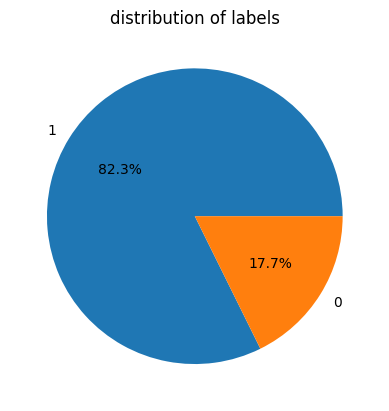

In [23]:
label_pct = tweets_labeled['label'].value_counts(normalize=True) * 100

plt.pie(label_pct, labels=label_pct.index, autopct='%1.1f%%')
plt.title('distribution of labels')
plt.show()

Unfortunately, our data is unbalanced.

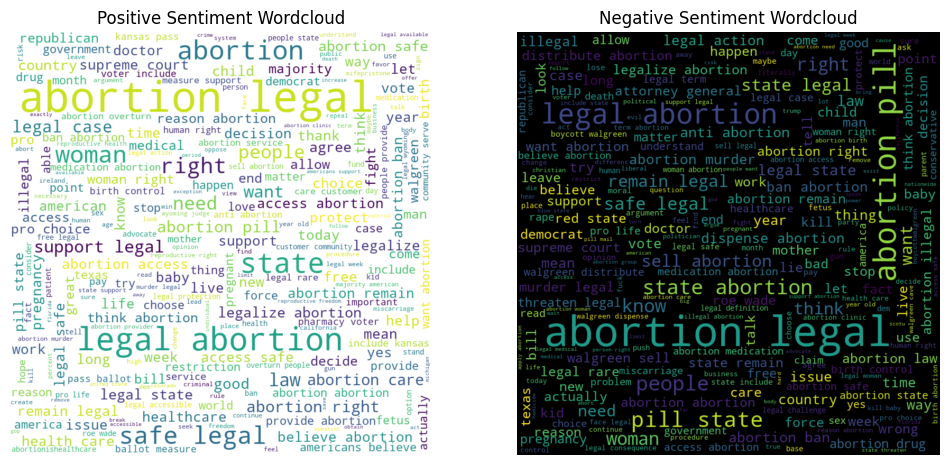

In [6]:
positive = tweets_labeled[tweets_labeled['label'] == 0]
negative = tweets_labeled[tweets_labeled['label'] == 1]


positive_text = ' '.join((words) for words in positive['lemma']).replace("'","")
negative_text = ' '.join((words) for words in negative['lemma']).replace("'","")

positive_wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 250).generate(positive_text)
negative_wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 250).generate(negative_text)

plt.figure(figsize=(12, 12))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiment Wordcloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Sentiment Wordcloud')

plt.show()

# 1. Naive Bayesian Model

Now that we have completed some initial cleaning of our data, we can proceed to develop our classification models. One of the most commonly applied models in Natural Language Processing (NLP) is the Naive Bayes classifier. Naive Bayes classifiers are a family of classification algorithms based on Bayes’ Theorem. While it is not a single algorithm, all of the classifiers in this family share the following naive assumptions:

- All features are independent of one another.
- Each feature contributes equally to the output.
In the context of our problem, we can interpret these assumptions as follows:

- Each word is independent of every other word in the sentence.
- Each word is equally important, irrespective of its position in the sentence.

Despite these oversimplifications, Naive Bayes classifiers remain a popular choice in NLP and often achieve impressive results.

In [7]:
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
tweets = shuffle(tweets_labeled.reset_index(drop=True))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(tweets.lemma,tweets.label, test_size = 0.1, stratify=tweets.label, random_state=42)

In [9]:
vectorizer = TfidfVectorizer(max_features=500000, ngram_range=(1,2)) # ngram pary
vectorizer.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [10]:
len(vectorizer.get_feature_names_out())

157193

In [11]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
X_train.shape

(21447, 157193)

In [13]:
X_test.shape

(2384, 157193)

In [14]:
model_bayes = BernoulliNB()
model_bayes.fit(X_train, y_train)

BernoulliNB()

In [15]:
y_pred = model_bayes.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  33  389]
 [   5 1957]]


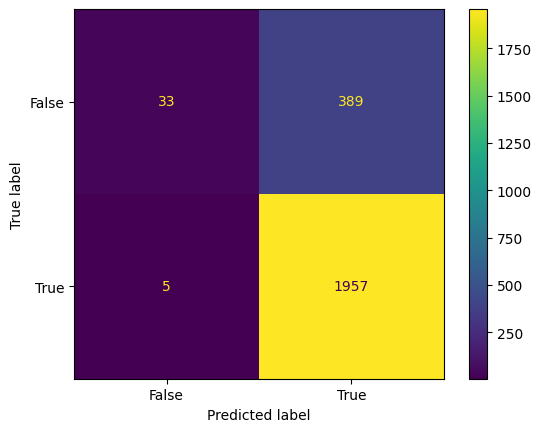

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


y_pred_prob = model_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(classification_report(y_test, y_pred))
print("Area Under the Curve = ", roc_auc)

              precision    recall  f1-score   support

           0       0.87      0.08      0.14       422
           1       0.83      1.00      0.91      1962

    accuracy                           0.83      2384
   macro avg       0.85      0.54      0.53      2384
weighted avg       0.84      0.83      0.77      2384

Area Under the Curve =  0.7952042600886029


In [18]:
cross_model_bayes = np.mean(cross_val_score(model_bayes, X_train, y_train, cv=5))

print("Cross Validation. score = {:.2f}%".format(cross_model_bayes.mean()*100))
print("Train accuracy = {:.2f}%".format(model_bayes.score(X_train, y_train) * 100))
print("Test accuracy = {:.2f}%".format(model_bayes.score(X_test,y_test)*100))


train_acc_model = model_bayes.score(X_train, y_train)
test_acc_model = model_bayes.score(X_test, y_test)

Cross Validation. score = 83.02%
Train accuracy = 87.62%
Test accuracy = 83.47%


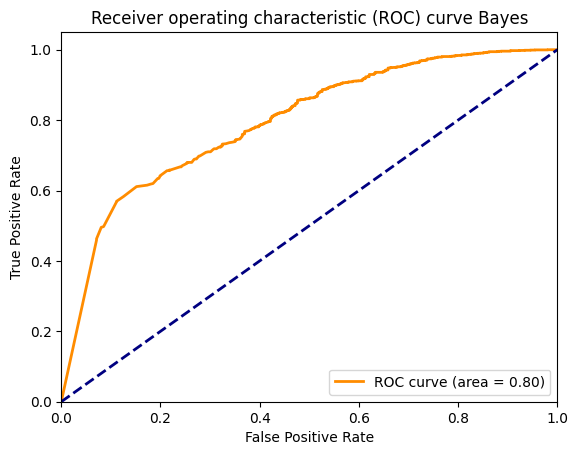

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve Bayes')
plt.legend(loc="lower right")
plt.show()


# 2. SVM (Support Vector Machine)

SVM model can be used to predict the sentiment of text data. By finding the best boundary that separates positive and negative sentiment, SVM can accurately classify text documents. SVMs are especially useful in handling high-dimensional feature spaces and non-linear decision boundaries, making them a popular choice for sentiment analysis tasks. With proper selection of hyperparameters and kernel functions, SVMs can achieve excellent performance in predicting sentiment.

SVM models are generally well-calibrated, but there are certain cases where calibration is required.

One reason for calibrating an SVM model is when the SVM outputs scores that are not well-calibrated probabilities. In these cases, the scores may not accurately reflect the true probabilities of the positive class, and therefore may not be directly interpretable as probabilities. Calibrating the SVM model can adjust these scores to better approximate the true probabilities.

Another reason for calibration is when the SVM model is trained on imbalanced data, i.e., when the number of examples in one class is much larger than the other class. In such cases, the SVM model may be biased towards the majority class and may have difficulty accurately predicting the minority class. Calibrating the SVM model can help to reduce this bias and improve the overall accuracy of the model.

**For our case it can be useful to calibrate the model since our classes are imbalanced (82% to 18%). Also, thanks to calibration we can plot ROC curve chart. (SVM model itself does not inherently provide probabilities like other classifiers such as logistic regression or Naive Bayes).**

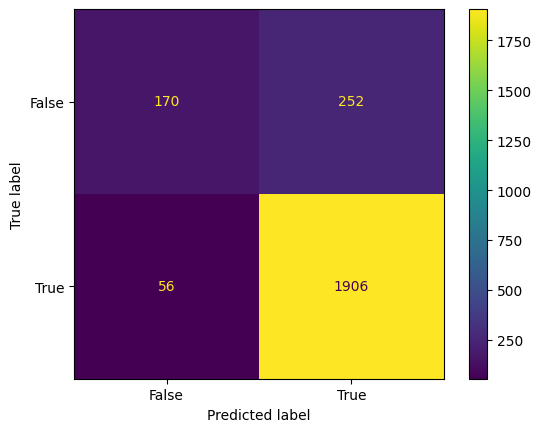

In [20]:
# This cell takes around 8 minutes

from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

SVCmodel = SVC()
# wrap the SVM model in a CalibratedClassifierCV object to perform Platt scaling
platt_model = CalibratedClassifierCV(SVCmodel, cv=5, method='sigmoid')

platt_model.fit(X_train, y_train)

y_pred2 = platt_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.show()

In [22]:
# This cell takes around 6minutes

y_pred_prob2 = platt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
roc_auc = roc_auc_score(y_test, y_pred_prob2)

print(classification_report(y_test, y_pred2))
print("Area Under the Curve = ", roc_auc)

# We dont do cross validation here - it's too much time-consuming and not necesary for our models comparison
#cross_model_svm = np.mean(cross_val_score(platt_model, X_train, y_train, cv=5))

#print("Cross Validation. score = {:.2f}%".format(cross_model_svm.mean()*100))
print("Train accuracy = {:.2f}%".format(platt_model.score(X_train, y_train) * 100))
print("Test accuracy = {:.2f}%".format(platt_model.score(X_test,y_test)*100))


train_acc_model = platt_model.score(X_train, y_train)
test_acc_model = platt_model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.75      0.40      0.52       422
           1       0.88      0.97      0.93      1962

    accuracy                           0.87      2384
   macro avg       0.82      0.69      0.72      2384
weighted avg       0.86      0.87      0.85      2384

Area Under the Curve =  0.8545685561207976
Train accuracy = 98.30%
Test accuracy = 87.08%


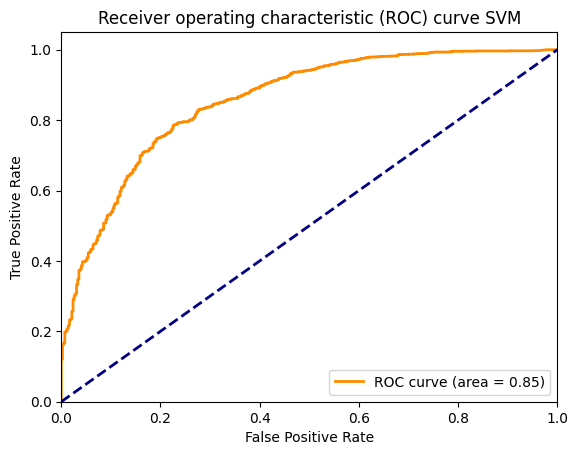

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob2 = platt_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve SVM')
plt.legend(loc="lower right")
plt.show()


# 3. Logistic Regression

Last model to check is Logistic Regression. Logistic Regression is another popular classification model in NLP. Unlike Naive Bayes, Logistic Regression doesn't assume independence between features. Instead, it uses a linear function to model the relationship between the features and the target variable, and applies a sigmoid function to the output to get probabilities.

In the context of our problem, Logistic Regression can be used to model the relationship between the words in a sentence and the sentiment label, taking into account the interactions between the words. While it may not achieve the same level of performance as Naive Bayes in some cases, it can be a good alternative when the independence assumption doesn't hold or when more complex interactions between features need to be modeled.

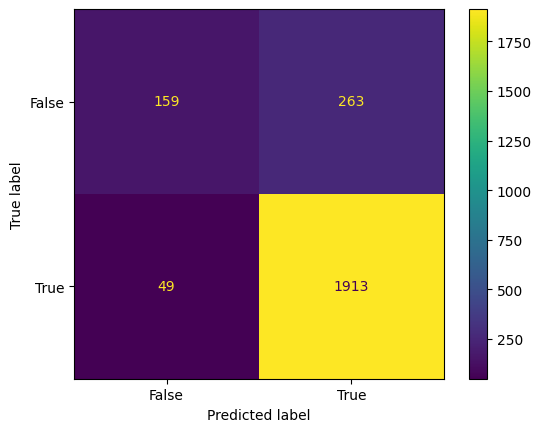

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
model_lr.fit(X_train, y_train)

y_pred3 = model_lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.show()

In [27]:
y_pred_prob3 = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3)
roc_auc = roc_auc_score(y_test, y_pred_prob3)

print(classification_report(y_test, y_pred3))
print("Area Under the Curve = ", roc_auc)

cross_model_lr = np.mean(cross_val_score(model_lr, X_train, y_train, cv=5))

print("Cross Validation. score = {:.2f}%".format(cross_model_lr.mean()*100))
print("Train accuracy = {:.2f}%".format(model_lr.score(X_train, y_train) * 100))
print("Test accuracy = {:.2f}%".format(model_lr.score(X_test,y_test)*100))


train_acc_model = model_lr.score(X_train, y_train)
test_acc_model = model_lr.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.76      0.38      0.50       422
           1       0.88      0.98      0.92      1962

    accuracy                           0.87      2384
   macro avg       0.82      0.68      0.71      2384
weighted avg       0.86      0.87      0.85      2384

Area Under the Curve =  0.8653335169161944
Cross Validation. score = 85.50%
Train accuracy = 90.20%
Test accuracy = 86.91%


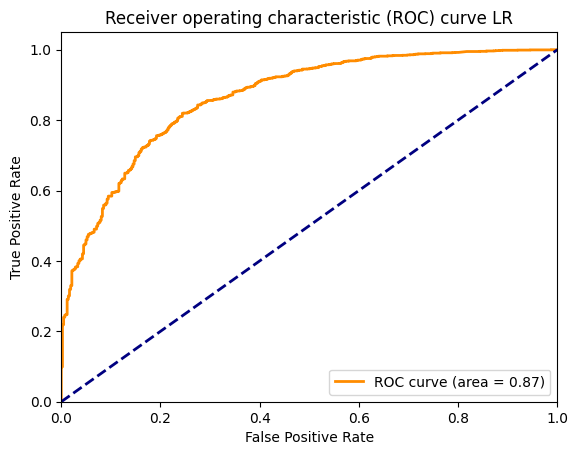

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob3 = model_lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob3)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve LR')
plt.legend(loc="lower right")
plt.show()


In [29]:
# This cell takes around 3minutes

from sklearn.metrics import f1_score

# Get predictions for each model
y_pred_lr = model_lr.predict(X_test)
y_pred_bayes = model_bayes.predict(X_test)
y_pred_svc = platt_model.predict(X_test)

# Calculate F1 score for each model
f1_lr = f1_score(y_test, y_pred_lr)
f1_bayes = f1_score(y_test, y_pred_bayes)
f1_svc = f1_score(y_test, y_pred_svc)

# Calculate accuracy for each model
acc_lr = model_lr.score(X_test, y_test)
acc_bayes = model_bayes.score(X_test, y_test)
acc_svc = platt_model.score(X_test, y_test)

# Calculate train accuracy for each model
train_acc_lr = model_lr.score(X_train, y_train)
train_acc_bayes = model_bayes.score(X_train, y_train)
train_acc_svc = platt_model.score(X_train, y_train)

# Create a pandas DataFrame with the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Support Vector Classifier'],
    'F1 Score': [f1_lr, f1_bayes, f1_svc],
    'Test Accuracy': [acc_lr, acc_bayes, acc_svc],
    'Train Accuracy': [train_acc_lr, train_acc_bayes, train_acc_svc]
})

# Display the results
print(results)

                       Model  F1 Score  Test Accuracy  Train Accuracy
0        Logistic Regression  0.924601       0.869128        0.901991
1                Naive Bayes  0.908542       0.834732        0.876160
2  Support Vector Classifier  0.925243       0.870805        0.983028


# 4. Models Evaluation

Upon evaluating all of the models, we can conclude the following details: 

- **Accuracy**: When it comes to accuracy, the best performer is Support Vector Classifier which gained 87% of Test Accuracy. However, the difference between SVM and Logistic Regression is marginal. (LR gained 86.9% of Accuracy)

- **F1 Score**: Here Logistic Regression outperformed the rest of the models, although the difference between Logistic Regression model and Support Vector Classifier is marginal.

- **AUC Score**: Here again Logistic Regression performed the best. 

We, therefore, conclude that the Logistic Regression is the best model for the above-given dataset. Hence, it is worth noticing that SVM model also performed very well and the difference between its and LR performance was marginal. The reason behind excellent performance of SVM model may lie in calibration of SVM model.

